In [1]:
# Import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow
from tensorflow import keras
from tensorflow.keras.layers import Dense, Activation, LSTM
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
import os

In [2]:
# Use CPU
os.environ['CUDA_VISIBLE_DEVICES'] = '-1'

In [3]:
print(tensorflow.__version__)

2.8.0


In [4]:
# Dataset
df=pd.read_csv('./../../dataset/raw_jawa_barat.csv', parse_dates=["date"], index_col="date")
#df['daily_case'] = df['daily_case'].str.replace(',','').astype(int)

# Cut dataset to start from 1 April 2022
df = df[29:]
df.head()

,daily_case
date,
2020-04-01,20
2020-04-02,15
2020-04-03,2
2020-04-04,20
2020-04-05,6


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 766 entries, 2020-04-01 to 2022-05-06
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   daily_case  766 non-null    int64
dtypes: int64(1)
memory usage: 12.0 KB


In [6]:
df.shape

(766, 1)

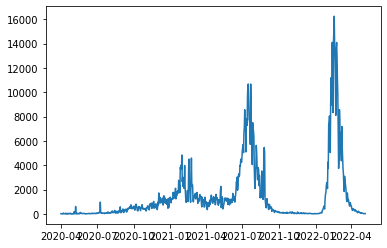

In [7]:
plt.plot(df)

In [8]:
scaler = MinMaxScaler(feature_range=(0,1))

In [9]:
df.shape

(766, 1)

In [10]:
df.head()

,daily_case
date,
2020-04-01,20
2020-04-02,15
2020-04-03,2
2020-04-04,20
2020-04-05,6


In [11]:
# df = scaler.fit_transform(np.array(df).reshape(-1,1))

In [12]:
df.shape

(766, 1)

In [13]:
# Split data to train and test
df = df.values
df = df.astype('float32')
train_size = int(len(df) * 0.75)
test_size=len(df)-train_size

In [14]:
train_data=df[0:train_size,:]
test_data=df[train_size:len(df),:]

In [15]:
# scale data
train_data = scaler.fit_transform(np.array(train_data).reshape(-1,1))
test_data = scaler.fit_transform(np.array(test_data).reshape(-1,1))

In [16]:
train_data.shape

(574, 1)

In [17]:
print(len(train_data)), print(len(test_data))

574
192


(None, None)

In [18]:
# Create dataset matrix based on timestep
def create_dataset(dataset, time_step=1):
    X, Y = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]
        X.append(a)
        Y.append(dataset[i + time_step, 0])
    return np.array(X), np.array(Y)

In [19]:
# Reshape into x=t, t+1, t+2, ... t+n, and Y = t + (n+1)
time_step = 30
X_train, Y_train = create_dataset(train_data, time_step)
X_test, Y_test = create_dataset(test_data, time_step)

In [20]:
print(X_train.shape), print(Y_train.shape)

(543, 30)
(543,)


(None, None)

In [21]:
print(X_test.shape), print(Y_test.shape)

(161, 30)
(161,)


(None, None)

In [22]:
len(X_test)

161

In [23]:
# Reshape input data to 3d [sample, time_step, features]
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [24]:
# # Create model
# model = Sequential()
# model.add(LSTM(192, return_sequences=True, input_shape=(30,1)))
# model.add(LSTM(64, return_sequences=True))
# model.add(LSTM(224, return_sequences=True))
# model.add(LSTM(160, activation='relu'))
# model.add(Dropout(0.1))
# model.add(Dense(1))
# model.compile(optimizer='adam', loss='mean_squared_error')

In [25]:
# Create Stacked LSTM model
model = Sequential()
model.add(LSTM(100, activation='relu', return_sequences=True, input_shape=(30,1)))
model.add(LSTM(100))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 30, 100)           40800     
                                                                 
 lstm_1 (LSTM)               (None, 100)               80400     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 121,301
Trainable params: 121,301
Non-trainable params: 0
_________________________________________________________________


In [27]:
model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=200, batch_size=32, verbose=1)

Epoch 1/200
17/17 [==============================] - 4s 71ms/step - loss: 0.0152 - val_loss: 0.0188
Epoch 2/200
17/17 [==============================] - 1s 35ms/step - loss: 0.0064 - val_loss: 0.0123
Epoch 3/200
17/17 [==============================] - 1s 35ms/step - loss: 0.0052 - val_loss: 0.0086
Epoch 4/200
17/17 [==============================] - 1s 35ms/step - loss: 0.0051 - val_loss: 0.0092
Epoch 5/200
17/17 [==============================] - 1s 36ms/step - loss: 0.0050 - val_loss: 0.0093
Epoch 6/200
17/17 [==============================] - 1s 35ms/step - loss: 0.0048 - val_loss: 0.0083
Epoch 7/200
17/17 [==============================] - 1s 36ms/step - loss: 0.0050 - val_loss: 0.0088
Epoch 8/200
17/17 [==============================] - 1s 36ms/step - loss: 0.0048 - val_loss: 0.0084
Epoch 9/200
17/17 [==============================] - 1s 35ms/step - loss: 0.0045 - val_loss: 0.0080
Epoch 10/200
17/17 [==============================] - 1s 35ms/step - loss: 0.0045 - val_loss: 0.0078

17/17 [==============================] - 1s 30ms/step - loss: 0.0025 - val_loss: 0.0067
Epoch 83/200
17/17 [==============================] - 0s 29ms/step - loss: 0.0025 - val_loss: 0.0089
Epoch 84/200
17/17 [==============================] - 0s 28ms/step - loss: 0.0026 - val_loss: 0.0078
Epoch 85/200
17/17 [==============================] - 1s 31ms/step - loss: 0.0026 - val_loss: 0.0078
Epoch 86/200
17/17 [==============================] - 0s 30ms/step - loss: 0.0027 - val_loss: 0.0076
Epoch 87/200
17/17 [==============================] - 1s 30ms/step - loss: 0.0025 - val_loss: 0.0073
Epoch 88/200
17/17 [==============================] - 1s 30ms/step - loss: 0.0025 - val_loss: 0.0070
Epoch 89/200
17/17 [==============================] - 0s 29ms/step - loss: 0.0023 - val_loss: 0.0070
Epoch 90/200
17/17 [==============================] - 0s 27ms/step - loss: 0.0024 - val_loss: 0.0075
Epoch 91/200
17/17 [==============================] - 0s 28ms/step - loss: 0.0025 - val_loss: 0.0094
Epo

17/17 [==============================] - 0s 27ms/step - loss: 0.0018 - val_loss: 0.0130
Epoch 163/200
17/17 [==============================] - 0s 29ms/step - loss: 0.0022 - val_loss: 0.0132
Epoch 164/200
17/17 [==============================] - 0s 28ms/step - loss: 0.0021 - val_loss: 0.0098
Epoch 165/200
17/17 [==============================] - 0s 28ms/step - loss: 0.0019 - val_loss: 0.0150
Epoch 166/200
17/17 [==============================] - 0s 27ms/step - loss: 0.0021 - val_loss: 0.0079
Epoch 167/200
17/17 [==============================] - 0s 27ms/step - loss: 0.0021 - val_loss: 0.0121
Epoch 168/200
17/17 [==============================] - 0s 28ms/step - loss: 0.0021 - val_loss: 0.0131
Epoch 169/200
17/17 [==============================] - 0s 27ms/step - loss: 0.0021 - val_loss: 0.0115
Epoch 170/200
17/17 [==============================] - 0s 28ms/step - loss: 0.0020 - val_loss: 0.0134
Epoch 171/200
17/17 [==============================] - 0s 29ms/step - loss: 0.0019 - val_loss: 0

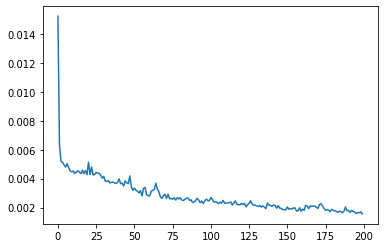

In [28]:
loss_per_epoch = model.history.history['loss']
plt.plot(range(len(loss_per_epoch)), loss_per_epoch)

In [29]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [30]:
# Transform back to original value
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [31]:
# Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(Y_train, train_predict))

3213.647460441173

In [32]:
math.sqrt(mean_squared_error(Y_test, test_predict))

4854.609356065635

In [33]:
train_predict

array([[   58.55701 ],
       [   54.043262],
       [   62.896255],
       [   59.103783],
       [  122.83333 ],
       [  105.250465],
       [   81.15857 ],
       [   85.849724],
       [  312.91962 ],
       [  216.65854 ],
       [  146.06932 ],
       [  143.78506 ],
       [  149.2468  ],
       [  134.22763 ],
       [  122.26446 ],
       [  119.96735 ],
       [  106.59547 ],
       [  109.591225],
       [   99.904305],
       [   93.07586 ],
       [  127.48899 ],
       [  125.00127 ],
       [  124.817085],
       [  124.82138 ],
       [  112.922554],
       [   99.86769 ],
       [   98.381386],
       [   94.41299 ],
       [   93.26513 ],
       [   96.06115 ],
       [   86.92824 ],
       [   71.70921 ],
       [   62.960766],
       [   65.85852 ],
       [   59.06941 ],
       [   57.25637 ],
       [   63.9173  ],
       [   62.557327],
       [   68.665436],
       [   68.65639 ],
       [   68.49362 ],
       [   77.29896 ],
       [   77.003815],
       [   

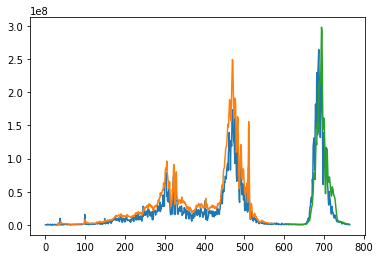

In [34]:
# Plot 
look_back = 30
trainPredictPlot = np.empty_like(df)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict

#shift test predict
testPredictPlot = np.empty_like(df)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df)-1, :] = test_predict

#plot baseline
plt.plot(scaler.inverse_transform(df))
plt.plot(scaler.inverse_transform(trainPredictPlot))
plt.plot(scaler.inverse_transform(testPredictPlot))
plt.show()

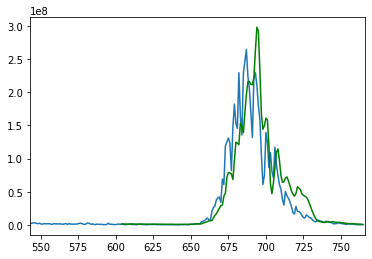

In [35]:
#shift test predict
testPredictPlot = np.empty_like(df)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df)-1, :] = test_predict

#plot baseline
plt.plot(scaler.inverse_transform(df))
plt.plot(scaler.inverse_transform(testPredictPlot), 'g')
plt.xlim(X_train.shape[0], df.shape[0])
plt.show()

In [36]:
len(test_data)

192

In [37]:
x_input=test_data[162:].reshape(1,-1) #test data - step(30)
x_input.shape

(1, 30)

In [38]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [39]:
temp_input

[0.022160666063427925,
 0.020190829411149025,
 0.016004925593733788,
 0.013973530381917953,
 0.02056017331779003,
 0.018528778105974197,
 0.01434287428855896,
 0.013727300800383091,
 0.012003692798316479,
 0.0057248384691774845,
 0.006648199632763863,
 0.007263773586601019,
 0.013234840705990791,
 0.00935672502964735,
 0.008187133818864822,
 0.006525084841996431,
 0.004801477305591106,
 0.0033240998163819313,
 0.0029547554440796375,
 0.006032625678926706,
 0.004247460979968309,
 0.004062788560986519,
 0.003939673770219088,
 0.002462296048179269,
 0.002462296048179269,
 0.0005540166166611016,
 0.0007386888028122485,
 0.0012311481405049562,
 0.0017236073035746813,
 0.0015389351174235344]

In [40]:
# prediction for next 30 days
from numpy import array

lst_output=[]
n_steps=30
i=0
while(i<30): #30 hari
    
    if(len(temp_input)>30):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.00315343]
31
1 day input [0.02019083 0.01600493 0.01397353 0.02056017 0.01852878 0.01434287
 0.0137273  0.01200369 0.00572484 0.0066482  0.00726377 0.01323484
 0.00935673 0.00818713 0.00652508 0.00480148 0.0033241  0.00295476
 0.00603263 0.00424746 0.00406279 0.00393967 0.0024623  0.0024623
 0.00055402 0.00073869 0.00123115 0.00172361 0.00153894 0.00315343]
1 day output [[0.0034383]]
2 day input [0.01600493 0.01397353 0.02056017 0.01852878 0.01434287 0.0137273
 0.01200369 0.00572484 0.0066482  0.00726377 0.01323484 0.00935673
 0.00818713 0.00652508 0.00480148 0.0033241  0.00295476 0.00603263
 0.00424746 0.00406279 0.00393967 0.0024623  0.0024623  0.00055402
 0.00073869 0.00123115 0.00172361 0.00153894 0.00315343 0.0034383 ]
2 day output [[0.00366009]]
3 day input [0.01397353 0.02056017 0.01852878 0.01434287 0.0137273  0.01200369
 0.00572484 0.0066482  0.00726377 0.01323484 0.00935673 0.00818713
 0.00652508 0.00480148 0.0033241  0.00295476 0.00603263 0.00424746
 0.00406279 0.00393967

24 day output [[0.01066123]]
25 day input [0.00055402 0.00073869 0.00123115 0.00172361 0.00153894 0.00315343
 0.0034383  0.00366009 0.00386961 0.00411499 0.00438447 0.00466526
 0.00496621 0.00523269 0.00549879 0.00577153 0.006081   0.00641065
 0.0067527  0.00709267 0.00742537 0.00775493 0.00808224 0.00843444
 0.00880332 0.00917863 0.00956178 0.00993869 0.01030788 0.01066123]
25 day output [[0.01099542]]
26 day input [0.00073869 0.00123115 0.00172361 0.00153894 0.00315343 0.0034383
 0.00366009 0.00386961 0.00411499 0.00438447 0.00466526 0.00496621
 0.00523269 0.00549879 0.00577153 0.006081   0.00641065 0.0067527
 0.00709267 0.00742537 0.00775493 0.00808224 0.00843444 0.00880332
 0.00917863 0.00956178 0.00993869 0.01030788 0.01066123 0.01099542]
26 day output [[0.01132187]]
27 day input [0.00123115 0.00172361 0.00153894 0.00315343 0.0034383  0.00366009
 0.00386961 0.00411499 0.00438447 0.00466526 0.00496621 0.00523269
 0.00549879 0.00577153 0.006081   0.00641065 0.0067527  0.00709267
 0.

In [41]:
day_new=np.arange(1,31) # dari data 30 hari terakhir
day_pred=np.arange(31,61) #predict 30 hari kedepan

In [42]:
len(df)

766

In [43]:
len(day_pred)

30

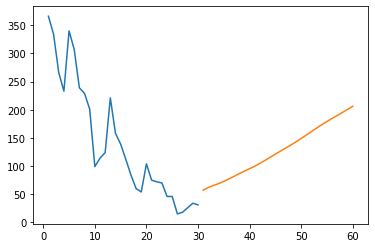

In [44]:
plt.plot(day_new,df[736:]) # [total data - prediction(30)] 
plt.plot(day_pred,scaler.inverse_transform(lst_output))

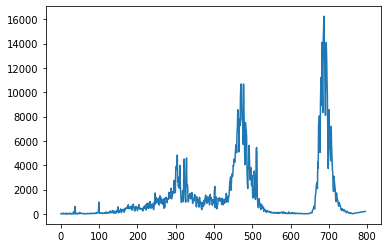

In [45]:
df2=df.tolist()
df2.extend(scaler.inverse_transform(lst_output))
plt.plot(df2)

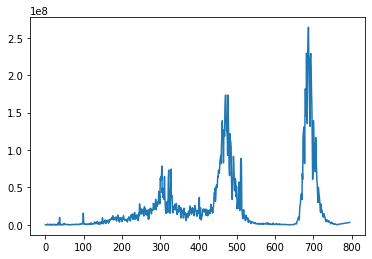

In [46]:
df2=scaler.inverse_transform(df2).tolist()
plt.plot(df2)

In [47]:
# evaluate the model
scores = model.evaluate(X_train, Y_train, verbose=0)
print("%s: %f" % (model.metrics_names[0], scores*100))

loss: 0.155334


In [48]:
# save model and architecture to single file
model.save("lstm_jawa_barat.h5")
print("Saved model to disk")

Saved model to disk


In [49]:
from keras.models import load_model
 
# load model
model = load_model('lstm_jawa_barat.h5')
# summarize model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 30, 100)           40800     
                                                                 
 lstm_1 (LSTM)               (None, 100)               80400     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 121,301
Trainable params: 121,301
Non-trainable params: 0
_________________________________________________________________
